In [1]:
import pandas as pd
df = pd.read_csv('encoded.csv', index_col=0)
df.head()

,date,time,district,n_p,dtp_v,s_pch,osv,change_org_motion,woman_drv,pogoda,driver_narush,alco,posled,sdor
0,2015-05-12,09:20:00,КАШАРСКИЙ,сл Кашары,1,1,2,2,1,1,1,0,1,5
1,2016-03-09,17:20:00,КАШАРСКИЙ,NaN,0,1,2,2,0,1,1,0,1,5
2,2018-08-19,17:40:00,КАШАРСКИЙ,NaN,0,1,2,2,0,1,1,0,0,5
3,2018-08-08,14:15:00,КАШАРСКИЙ,NaN,0,1,2,2,1,1,1,0,1,5
4,2015-03-07,21:15:00,КАШАРСКИЙ,NaN,1,1,0,1,0,1,1,1,2,5


In [7]:
df.date = pd.to_datetime(df.date)
df.head()

,date,time,district,n_p,dtp_v,s_pch,osv,change_org_motion,woman_drv,pogoda,driver_narush,alco,posled,sdor
0,2015-05-12,09:20:00,КАШАРСКИЙ,сл Кашары,1,1,2,2,1,1,1,0,1,5
1,2016-03-09,17:20:00,КАШАРСКИЙ,NaN,0,1,2,2,0,1,1,0,1,5
2,2018-08-19,17:40:00,КАШАРСКИЙ,NaN,0,1,2,2,0,1,1,0,0,5
3,2018-08-08,14:15:00,КАШАРСКИЙ,NaN,0,1,2,2,1,1,1,0,1,5
4,2015-03-07,21:15:00,КАШАРСКИЙ,NaN,1,1,0,1,0,1,1,1,2,5


In [4]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import itertools
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In C:\Users\Dimasyan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\Dimasyan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Dimasyan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\Dimasyan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Dimasyan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [14]:
#Функция построения графика матрицы ошибок
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    #if normalize:
        #cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [5]:
from sklearn.multiclass import OneVsRestClassifier

In [8]:
dfl = df[df['date'].dt.year == 2015]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [12]:
svclassifier = OneVsRestClassifier(SVC(kernel='rbf', probability=True), n_jobs=-1)#,'SVC rbf', X_train, X_test, y_train.values.ravel(), y_test.values.ravel()
svclassifier.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(probability=True), n_jobs=-1)

[[  207   945  4626]
 [   58  8903  2439]
 [  204  1604 17795]]


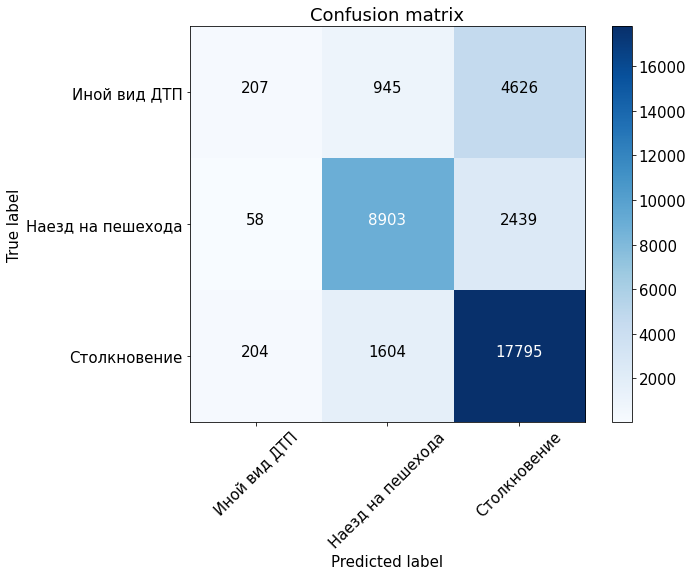

Точность модели составляет : 73.14918028329845


In [15]:
y_pred = svclassifier.predict(X_test)

font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

print('Точность модели составляет :',accuracy_score(y_test,y_pred)*100)